# Proyecto

Codebook para llevar a cabo el analisís preliminar de los datos obtenidos mediante la tecnica web-scrapping sobre [Mercado Libre Colombia](https://carros.mercadolibre.com.co/usados)



# Librerias necesarias

In [ ]:
import pandas as pd                #Importamos pandas para el manejo de los dataframes
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos.
import pydot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Importar datos recolectados

In [ ]:
data = 'https://github.com/Gevorah/cars-prediction/raw/main/cars-mercadolibre.csv'

df = pd.read_csv(data)

# Análisis exploratorio de los datos

## Revisión de la información básica del dataset y tipos de datos mapeados en el mismo

In [ ]:
df.head()

bodywork_type          brand                city   color  doors fuel_type  \
0           NaN            Kia             Kennedy     NaN    5.0  Gasolina   
1         Sedán     Volkswagen                Suba    Rojo    5.0  Gasolina   
2     Camioneta         Nissan  Rafael Uribe Uribe   Verde    4.0  Gasolina   
3     Camioneta           Ford             Usaquén    Azul    5.0  Gasolina   
4     Hatchback  Mercedes-Benz              Cajicá  Blanco    5.0  Gasolina   

   kilometers        model motor     price         state transmission    year  
0       120.0      Picanto   NaN  49300000   Bogotá D.C.     Mecánica  2023.0  
1    126300.0        Jetta   2.0  31000000   Bogotá D.C.     Mecánica  2009.0  
2     90884.0          D22  2400  61000000   Bogotá D.C.     Mecánica  2011.0  
3     96200.0         Edge   3.5  58000000   Bogotá D.C.   Automática  2011.0  
4    102741.0  Clase B 180   NaN  46000000  Cundinamarca   Automática  2012.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27929 entries, 0 to 27928
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bodywork_type  22701 non-null  object 
 1   brand          27833 non-null  object 
 2   city           27929 non-null  object 
 3   color          16073 non-null  object 
 4   doors          27788 non-null  float64
 5   fuel_type      27830 non-null  object 
 6   kilometers     27833 non-null  float64
 7   model          27833 non-null  object 
 8   motor          22829 non-null  object 
 9   price          27929 non-null  int64  
 10  state          27929 non-null  object 
 11  transmission   27833 non-null  object 
 12  year           27833 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 2.8+ MB


## Definición del tipo de dato adecuado para cada variable

In [ ]:
df['bodywork_type'] = df['bodywork_type'].astype("string")
df['brand'] = df['brand'].astype("string")
df['color'] = df['color'].astype("string")
df['doors'] = df['doors'].astype("float64")
df['fuel_type'] = df['fuel_type'].astype("string")
df['kilometers'] = df['kilometers'].astype("float64")
df['model'] = df['model'].astype("string")
df['price'] = df['price'].astype('float64')
df['transmission'] = df['transmission'].astype('string')
df['year'] = df['year'].astype("float64")
df['state'] = df['state'].astype('string')
df['city'] = df['city'].astype('string')

Verificación de la asignación de tipos realizada

In [ ]:
print(df.dtypes)

bodywork_type     string
brand             string
city              string
color             string
doors            float64
fuel_type         string
kilometers       float64
model             string
motor             object
price            float64
state             string
transmission      string
year             float64
dtype: object


In [ ]:
df = df.drop('motor', 1)

Se elimino la columna motor ya que en la recolección de los datos no se pudo recopilar el cilindraje del vehiculo debido a que los post de venta de los carros de mercado libre en el apartado de motor no colocaban el cilindrije sino la marca o el modelo, e incluso otro tipo de informacion que no tenia que ver con el motor.

## **Primer análisis exploratorio sobre variables continuas actuales**

In [ ]:
df.describe()

doors    kilometers         price          year
count  27788.000000  2.783300e+04  2.792900e+04  27833.000000
mean       4.483482  9.055621e+04  7.177380e+07   2012.612295
std       17.995192  1.443806e+05  7.111876e+07      8.185597
min        1.000000  0.000000e+00  1.500000e+06   1938.000000
25%        4.000000  3.800000e+04  3.480000e+07   2011.000000
50%        5.000000  7.500000e+04  5.200000e+07   2014.000000
75%        5.000000  1.200000e+05  8.600000e+07   2018.000000
max     3000.000000  1.545645e+07  3.100000e+09   2023.000000

## Verificación de inconsistencias en el dataset 

In [ ]:
print('¿El conjunto de datos tiene nan? {}\n'.format(df.isnull().values.any()))
print('¿Cuántos nan tiene en total? {}\n'.format(df.isnull().sum().sum()))

nan_dict = {attr:df[attr].isnull().sum() for attr in df}
print('¿Cómo están distribuidos los nan?\n', nan_dict)

¿El conjunto de datos tiene nan? True

¿Cuántos nan tiene en total? 17804

¿Cómo están distribuidos los nan?
 {'bodywork_type': 5228, 'brand': 96, 'city': 0, 'color': 11856, 'doors': 141, 'fuel_type': 99, 'kilometers': 96, 'model': 96, 'price': 0, 'state': 0, 'transmission': 96, 'year': 96}


## Limpieza de datos NaN

In [ ]:
df_no_nan = df.copy()

# fill 
values = {'kilometers':df_no_nan['kilometers'].mean(), 'price':df_no_nan['price'].mean()}
df_no_nan = df_no_nan.fillna(value=values)

# fill categorical data
df_no_nan = df_no_nan.fillna(method='pad') # not fill first row
df_no_nan = df_no_nan.fillna(method='bfill')
#df_no_nan = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27929 entries, 0 to 27928
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bodywork_type  27929 non-null  string 
 1   brand          27929 non-null  string 
 2   city           27929 non-null  string 
 3   color          27929 non-null  string 
 4   doors          27929 non-null  float64
 5   fuel_type      27929 non-null  string 
 6   kilometers     27929 non-null  float64
 7   model          27929 non-null  string 
 8   price          27929 non-null  float64
 9   state          27929 non-null  string 
 10  transmission   27929 non-null  string 
 11  year           27929 non-null  float64
dtypes: float64(4), string(8)
memory usage: 2.6 MB


In [ ]:
df_no_nan.head()

bodywork_type          brand                city   color  doors fuel_type  \
0         Sedán            Kia             Kennedy    Rojo    5.0  Gasolina   
1         Sedán     Volkswagen                Suba    Rojo    5.0  Gasolina   
2     Camioneta         Nissan  Rafael Uribe Uribe   Verde    4.0  Gasolina   
3     Camioneta           Ford             Usaquén    Azul    5.0  Gasolina   
4     Hatchback  Mercedes-Benz              Cajicá  Blanco    5.0  Gasolina   

   kilometers        model       price         state transmission    year  
0       120.0      Picanto  49300000.0   Bogotá D.C.     Mecánica  2023.0  
1    126300.0        Jetta  31000000.0   Bogotá D.C.     Mecánica  2009.0  
2     90884.0          D22  61000000.0   Bogotá D.C.     Mecánica  2011.0  
3     96200.0         Edge  58000000.0   Bogotá D.C.   Automática  2011.0  
4    102741.0  Clase B 180  46000000.0  Cundinamarca   Automática  2012.0

## Outliers

In [ ]:
def removeOutlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([0.25,0.75])
  IRQ = Q3 - Q1
  lowerRange = Q1 - (1.5*IRQ)
  upperRange = Q3 + (1.5*IRQ)
  return lowerRange, upperRange

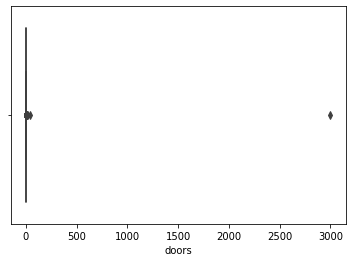

In [ ]:
ax = sns.boxplot(x=df_no_nan['doors'])

In [ ]:
lowerRange, upperRange = removeOutlier(df_no_nan['doors'])
df_no_nan['doors']=np.where(df['doors']>upperRange,upperRange,df_no_nan['doors'])
df_no_nan['doors']=np.where(df['doors']<lowerRange,upperRange,df_no_nan['doors'])
df_no_nan.shape

(27929, 12)

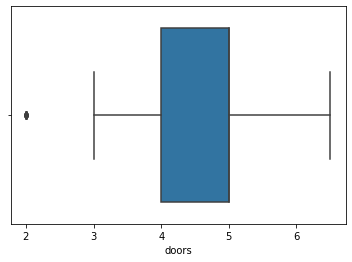

In [ ]:
ax = sns.boxplot(x=df_no_nan['doors'])

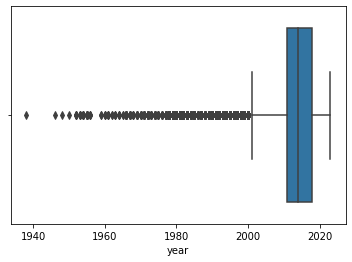

In [ ]:
ax = sns.boxplot(x=df_no_nan['year'])

In [ ]:
print((df_no_nan.kilometers < 0).sum())

0


No hay vehiculos con kilometraje menor a 0 por lo que no se saca outliers

In [ ]:
df_with_color = df_no_nan.copy()

df_without_color = df_with_color.drop(columns='color')

df = df_with_color

In [ ]:
df.describe()

doors    kilometers         price          year
count  27929.000000  2.792900e+04  2.792900e+04  27929.000000
mean       4.775448  9.055621e+04  7.177380e+07   2012.614164
std        0.754581  1.441323e+05  7.111876e+07      8.184863
min        2.000000  0.000000e+00  1.500000e+06   1938.000000
25%        4.000000  3.800000e+04  3.480000e+07   2011.000000
50%        5.000000  7.500000e+04  5.200000e+07   2014.000000
75%        5.000000  1.200000e+05  8.600000e+07   2018.000000
max        6.500000  1.545645e+07  3.100000e+09   2023.000000

## Visualización de los datos

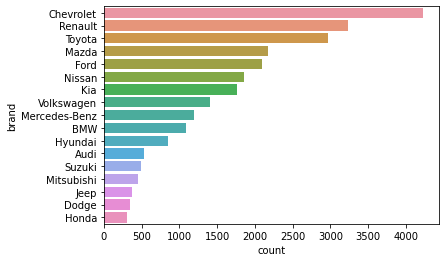

In [ ]:
brands = pd.DataFrame(df['brand'].value_counts()).reset_index().rename(columns={'index':'brand','brand': 'count'})
brands.drop(brands[brands['count'] <= 300].index, inplace=True)
ax = sns.barplot(y='brand', x='count', data=brands)

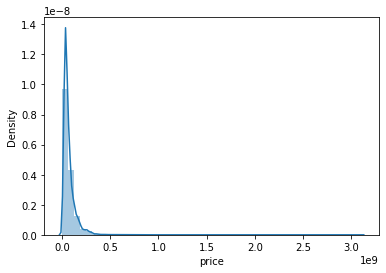

In [ ]:
ax = sns.distplot(df['price'], kde=True)

<AxesSubplot:xlabel='kilometers', ylabel='price'>

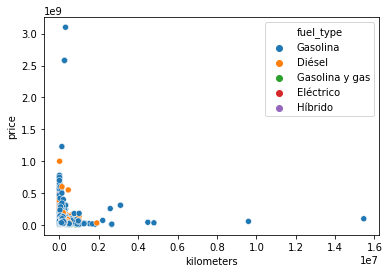

In [ ]:
sns.scatterplot(x="kilometers", y="price", data=df, hue="fuel_type")

<AxesSubplot:xlabel='year', ylabel='kilometers'>

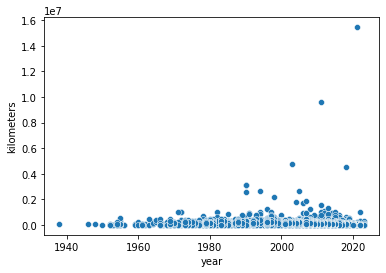

In [ ]:
sns.scatterplot(x="year", y="kilometers", data=df)

<AxesSubplot:xlabel='year', ylabel='price'>

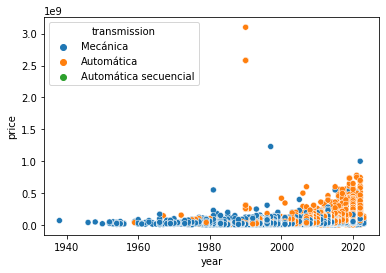

In [ ]:
sns.scatterplot(x="year", y="price", data=df, hue="transmission")

Text(0.5, 1.0, 'Histograma')

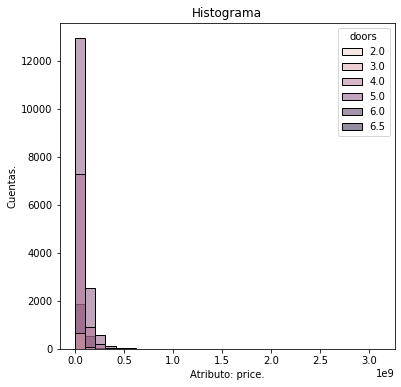

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='price',
             bins     = 30,
             hue      = 'doors',
             fill     = True,
             stat     = 'count')  #'count' muestra el número de observaciones.
                              #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                              #'density' normaliza las cuentas tal que el área del histograma es 1.
                              #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: price.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma') 

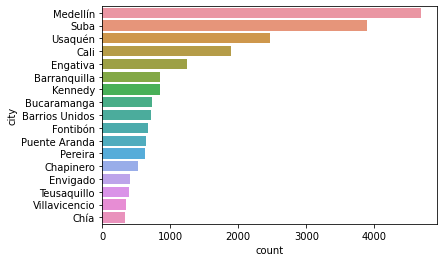

In [ ]:
cities = pd.DataFrame(df['city'].value_counts()).reset_index().rename(columns={'index':'city','city': 'count'})
cities.drop(cities[cities['count'] <= 300].index, inplace=True)
ax = sns.barplot(y='city', x='count', data=cities)

### Figura 1. Histograma de los tipos de transmisión

Text(0.5, 1.0, 'Histograma')

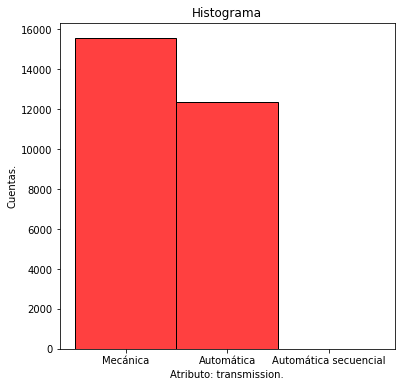

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        = 'transmission',
             bins     = 30,
             color    = 'red',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: transmission.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma')  

### Figura 2. Histograma de los tipos de combustible

Text(0.5, 1.0, 'Histograma')

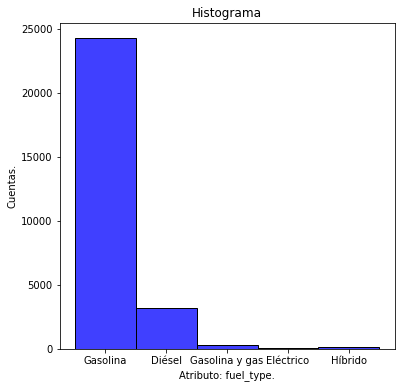

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='fuel_type',
             bins     = 30,
             color    = 'blue',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: fuel_type.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma') 

### Figura 3. Histograma del número de puertas

Text(0.5, 1.0, 'Histograma')

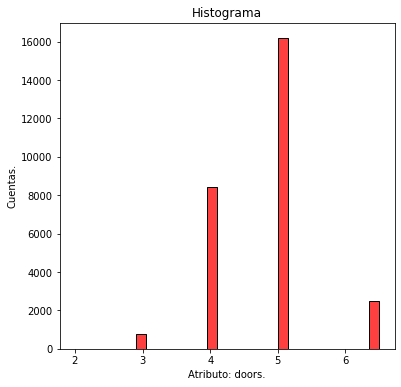

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='doors',
             bins     = 30,
             color    = 'red',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: doors.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma') 

### Figura 4. Gráfico de dispersión de kilometraje y precio coloreado de acuerdo al tipo de combustible

Text(0.5, 1.0, 'Histograma')

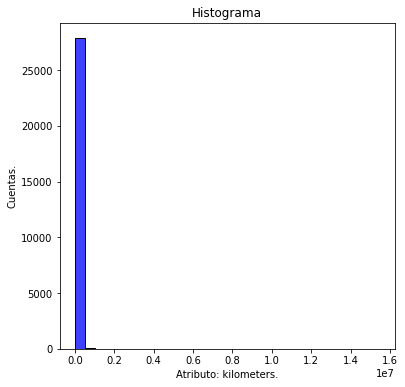

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='kilometers',
             bins     = 30,
             color    = 'blue',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: kilometers.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma') 

In [ ]:
#Vamos a generar otro gráfico exploratorio muy común, pero esta vez vamos a utilizar la librería altair.

import altair as alt   #Altair: Declarative Visualization in Python. https://altair-viz.github.io

alt.data_transformers.disable_max_rows()
alt.Chart(df).mark_point().encode(
  x='kilometers',
  y='price',
  color='fuel_type'
).interactive()

alt.Chart(...)

### Figura 5. Diagrama de caja para el kilometraje

<AxesSubplot:title={'center':'Box plot\nfuel_type'}>

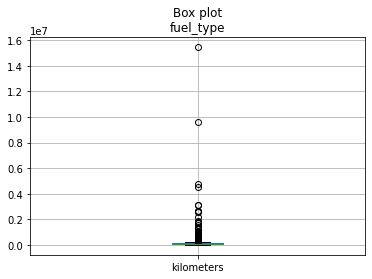

In [ ]:
plt.title('Box plot\n'+str(df.columns[5]))

df.boxplot(column='kilometers')

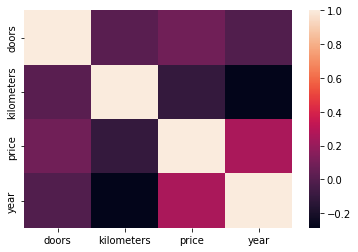

In [ ]:
ax = sns.heatmap(df.corr())

# Modelo

#### Regresión

In [ ]:
df.head()

bodywork_type          brand                city   color  doors fuel_type  \
0         Sedán            Kia             Kennedy    Rojo    5.0  Gasolina   
1         Sedán     Volkswagen                Suba    Rojo    5.0  Gasolina   
2     Camioneta         Nissan  Rafael Uribe Uribe   Verde    4.0  Gasolina   
3     Camioneta           Ford             Usaquén    Azul    5.0  Gasolina   
4     Hatchback  Mercedes-Benz              Cajicá  Blanco    5.0  Gasolina   

   kilometers        model       price         state transmission    year  
0       120.0      Picanto  49300000.0   Bogotá D.C.     Mecánica  2023.0  
1    126300.0        Jetta  31000000.0   Bogotá D.C.     Mecánica  2009.0  
2     90884.0          D22  61000000.0   Bogotá D.C.     Mecánica  2011.0  
3     96200.0         Edge  58000000.0   Bogotá D.C.   Automática  2011.0  
4    102741.0  Clase B 180  46000000.0  Cundinamarca   Automática  2012.0

#### Encoding

In [ ]:
x = df_with_color.apply(lambda col: LabelEncoder().fit_transform(col))

# input variables
x = x.drop(columns='price', axis=1)
features = x.columns

# output variables
y = df_with_color['price']

x[:10000]

bodywork_type  brand  city  color  doors  fuel_type  kilometers  model  \
0                12     88   163    115      3          2          65   1105   
1                12    179   328    115      3          2        4938    842   
2                 0    129   268    131      2          2        3983    547   
3                 0     49   365      8      3          2        4152    608   
4                 4    122    49     29      3          2        4378    462   
...             ...    ...   ...    ...    ...        ...         ...    ...   
9995              4     73   328     59      3          2        2845    252   
9996              4    171   195     59      3          0        5214    799   
9997             12    116   328     29      2          2        3524    206   
9998              4    144   163     29      3          2        3115   1394   
9999              0    171   328     29      3          2        5204    180   

      state  transmission  year  
0         3             2    73  
1         3             2    59  
2         3             2    61  
3         3             0    61  
4        12             0    62  
...     ...           ...   ...  
9995      3             2    65  
9996      6             0    65  
9997      3             0    65  
9998      3             2    65  
9999      3             0    65  

[10000 rows x 11 columns]

#### División del conjunto de datos

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(x, y,
                                                     test_size=0.2,
                                                     random_state=42,
                                                     shuffle=True)

print('Training x Shape:', x_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing x Shape:', x_test.shape)
print('Testing y Shape:', y_test.shape)

Training x Shape: (22343, 11)
Training y Shape: (22343,)
Testing x Shape: (5586, 11)
Testing y Shape: (5586,)


# Experimento 1 (Por defecto)

## Regresión Lineal

In [ ]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_predict = lreg.predict(x_test)

In [ ]:
print('Mean Absolute Error:', MAE(y_test, y_predict))
print('Mean Squared Error:', MSE(y_test, y_predict))
print('R2 score:', r2_score(y_test,y_predict))


Mean Absolute Error: 30175639.298038185
Mean Squared Error: 3616913935620800.5
R2 score: 0.2814026268618942


## Árbol de Decisión

In [ ]:
# Creación del modelo
# ------------------------------------------------------------------------------
dt = DecisionTreeRegressor(
            max_depth         = None,
            random_state      = 42
          )
          
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
dt.fit(x_train, y_train)
print(f"Profundidad del árbol: {dt.get_depth()}")
print(f"Número de nodos terminales: {dt.get_n_leaves()}")

Profundidad del árbol: 37
Número de nodos terminales: 21081


Profundidad del árbol: 3
Número de nodos terminales: 8


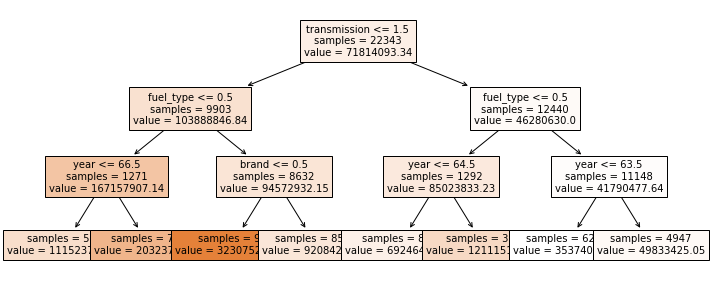

In [ ]:
dt1 = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 42
          )
dt1.fit(x_train, y_train)

# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {dt1.get_depth()}")
print(f"Número de nodos terminales: {dt1.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dt1,
            feature_names = df.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = "price").columns,
                             'importancia': dt.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
1           brand     0.203535
9    transmission     0.202638
7           model     0.141423
6      kilometers     0.132591
10           year     0.116295
5       fuel_type     0.092966
0   bodywork_type     0.040899
3           color     0.025448
2            city     0.022395
8           state     0.012277
4           doors     0.009534

In [ ]:

#-------------------------------------------------------------------------------
predicciones = dt.predict(X = x_test)

# Metricas de Evaluación

print('Mean Squared Error:', MSE(y_test, predicciones))

r2 = r2_score(y_test,predicciones)
print(f"El valor de r2 es:{r2} ")

print('El Mean Absolute Error es :', MAE(y_test, predicciones))




Mean Squared Error: 2400373135470349.5
El valor de r2 es:0.5231012237496846 
El Mean Absolute Error es : 16179950.65078645


## Random Forest

In [ ]:
# Train model
rf = RandomForestRegressor(random_state=42)

rf.fit(x_train, y_train)

rf_train_pred = rf.predict(x_train)

#### Predicciones con el set de pruebas

In [ ]:
rf_test_pred = rf.predict(x_test)

print('Mean Squared Error:', MSE(y_test, rf_test_pred))
print('Mean Absolute Error:', MAE(y_test, rf_test_pred))
print('R2 score:', r2_score(y_test, rf_test_pred))

Mean Squared Error: 1785775847583949.0
Mean Absolute Error: 12993304.463010322
R2 score: 0.6452075288689321


In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10,
                                 criterion='squared_error',
                                 max_depth=3)
rf_small.fit(x_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

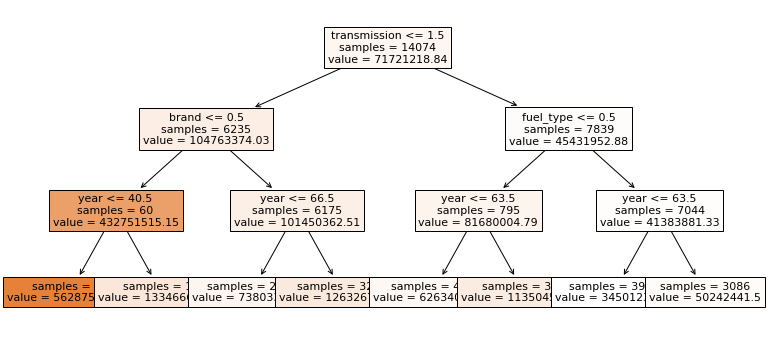

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))

plot = plot_tree(decision_tree = tree_small,
                 feature_names = features,
                 class_names   = 'price',
                 filled        = True,
                 impurity      = False,
                 fontsize      = 11,
                 precision     = 2,
                 ax            = ax)

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

gdf = pd.DataFrame(feature_importances).rename(columns={0:'variable', 1:'importance'})
gdf

variable  importance
0    transmission        0.20
1           brand        0.18
2           model        0.14
3      kilometers        0.13
4            year        0.12
5       fuel_type        0.09
6   bodywork_type        0.04
7            city        0.03
8           color        0.03
9           doors        0.02
10          state        0.02

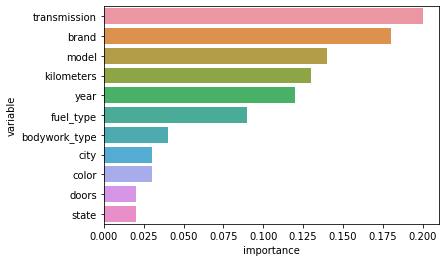

In [ ]:
%matplotlib inline

ax = sns.barplot(x='importance', y='variable', data=gdf)

## Cross-Validation

In [ ]:
scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']

cv = pd.DataFrame({'model':['linear_regression','decision_tree','random_forest']}, )

for sc in scoring:
    lrs = LinearRegression()
    lrs_scores = abs(cross_val_score(lreg, x_test, y_test, scoring=sc, cv=10))

    dts = DecisionTreeRegressor()
    dts_scores = abs(cross_val_score(dts, x_test, y_test, scoring=sc, cv=10))

    rfs = RandomForestRegressor()
    rfs_scores = abs(cross_val_score(rfs, x_test, y_test, scoring=sc, cv=10))

    cv = cv.join(pd.DataFrame({sc:[lrs_scores.mean(), dts_scores.mean(), rfs_scores.mean()]}))

cv.iloc[:,1:] = round(cv.iloc[:,1:],2)  
cv

model  neg_root_mean_squared_error  neg_mean_absolute_error  \
0  linear_regression                  55730713.66              30453546.09   
1      decision_tree                  54583745.80              21322617.87   
2      random_forest                  44452172.91              17313267.34   

     r2  
0  0.35  
1  0.38  
2  0.60

# Experimento 2 (Modificación Hiperparametros)

## Regresión Lineal

In [ ]:
LinearRegression().get_params()
#copy_X: Si su parametro es "true" entonces no sobreescribe x porque hace una copia,por defecto está en "true".(No lo cambiaremos)
#fit_intercept: Si su parametro es false, no se usaran interceptos para los calculos(Esto cuando se espera que los datos ya esten centrados).(Esta nos interesa porque suele estar como true)
#n_jobs: Esto activa el trabajo multi-thread, para aumentar un poco el procesamiento en varios hilos haciendo el procesamiento simultaneamente en diferentes threads, por defecto está como "None".(Este solo mejora el tiempo de carga asi que tampoco lo cambiamos)
#normalize: Esto esta deprecated asi que no moveremos nada de acá.(No se mueve)
#positive: Cuando es "true",  obliga a que los coeficientes sean positivos. (Esta podemos usarla, pero todos nuestros coeficientes ya son positivos)



{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
lreg = LinearRegression(fit_intercept=False)

lreg.fit(x_train, y_train)
y_predict = lreg.predict(x_test)
print('Mean Absolute Error:', MAE(y_test, y_predict))
print('Mean Squared Error:', MSE(y_test, y_predict))
print('R2 score:', r2_score(y_test,y_predict))

Mean Absolute Error: 30767840.435843535
Mean Squared Error: 3729245516402474.0
R2 score: 0.2590849327428312


## Árbol de Decisión

In [ ]:
# Create a based model
dtr = DecisionTreeRegressor()

dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
param_grid = {
    'max_depth': [10, 30],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [3, 6],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'max_depth': 30,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [ ]:
# Creación del modelo
# ------------------------------------------------------------------------------
model1 = DecisionTreeRegressor(
            max_depth         = 30,
            random_state      = 42,
            max_features      = 4,
            min_samples_leaf  = 2,
            min_samples_split = 6
          )
          
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model1.fit(x_train, y_train)

# Estructura del árbol creado
# ------------------------------------------------------------------------------


print("-------------------------------------------")
print(f"Profundidad del árbol: {model1.get_depth()}")
print(f"Número de nodos terminales: {model1.get_n_leaves()}")
print("-------------------------------------------")


importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = "price").columns,
                             'importancia': model1.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
print(importancia_predictores.sort_values('importancia', ascending=False))

#-------------------------------------------------------------------------------
predicciones = model1.predict(X = x_test)

print("-------------------------------------------")
# Metricas de Evaluación
print('Mean Squared Error:', MSE(y_test, predicciones))

r21 = r2_score(y_test,predicciones)
print(f"El valor de r2 es:{r21} ")

print('El Mean Absolute Error es :', MAE(y_test, predicciones))

-------------------------------------------
Profundidad del árbol: 30
Número de nodos terminales: 6650
-------------------------------------------
Importancia de los predictores en el modelo
-------------------------------------------
        predictor  importancia
9    transmission     0.225399
1           brand     0.197207
6      kilometers     0.150466
7           model     0.106810
10           year     0.105147
5       fuel_type     0.099791
0   bodywork_type     0.045924
3           color     0.020297
2            city     0.018887
4           doors     0.018618
8           state     0.011454
-------------------------------------------
Mean Squared Error: 2395264015706044.5
El valor de r2 es:0.524116288002533 
El Mean Absolute Error es : 18666404.50420798


## Random Forest

#### Grid Search with Cross Validation

In [ ]:
# Create a based model
gs_rf = RandomForestRegressor()

gs_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'max_depth': [10, 30],
    'max_features': [3, 4],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [3, 6],
    'n_estimators': [300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gs_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'max_depth': 30,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [ ]:
gs_rf = RandomForestRegressor(max_depth=30, max_features= 4, random_state=42,
                              min_samples_leaf=2, min_samples_split=3, n_estimators=300)
                                
gs_rf.fit(x_train, y_train)

gs_rf_test_pred = gs_rf.predict(x_test)

print('Mean Squared Error:', MSE(y_test, gs_rf_test_pred))
print('Mean Absolute Error:', MAE(y_test, gs_rf_test_pred))
print('R2 score:', r2_score(y_test, gs_rf_test_pred))

Mean Squared Error: 1806202543964582.0
Mean Absolute Error: 13837142.271858562
R2 score: 0.6411492154497345


In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

gdf = pd.DataFrame(feature_importances).rename(columns={0:'variable', 1:'importance'})
gdf

variable  importance
0    transmission        0.20
1           brand        0.18
2           model        0.14
3      kilometers        0.13
4            year        0.12
5       fuel_type        0.09
6   bodywork_type        0.04
7            city        0.03
8           color        0.03
9           doors        0.02
10          state        0.02

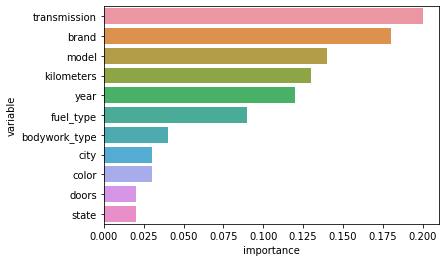

In [ ]:
%matplotlib inline

ax = sns.barplot(x='importance', y='variable', data=gdf)

## Cross-Validation

In [ ]:
cv = pd.DataFrame({'model':['linear_regression','decision_tree','random_forest']}, )

for sc in scoring:
    lrs = LinearRegression()
    lrs_scores = abs(cross_val_score(lreg, x_test, y_test, scoring=sc, cv=10))

    dts = DecisionTreeRegressor()
    dts_scores = abs(cross_val_score(dts, x_test, y_test, scoring=sc, cv=10))

    rfs = RandomForestRegressor()
    rfs_scores = abs(cross_val_score(rfs, x_test, y_test, scoring=sc, cv=10))

    cv = cv.join(pd.DataFrame({sc:[lrs_scores.mean(), dts_scores.mean(), rfs_scores.mean()]}))

cv.iloc[:,1:] = round(cv.iloc[:,1:],2)
cv

model  neg_root_mean_squared_error  neg_mean_absolute_error  \
0  linear_regression                  56526090.46              31011434.53   
1      decision_tree                  52202124.24              21408415.33   
2      random_forest                  44048250.65              17179803.65   

     r2  
0  0.33  
1  0.41  
2  0.60

# Experimento 3 (Eliminación de Variables)

#### Encoding

In [ ]:
x = df_without_color.apply(lambda col: LabelEncoder().fit_transform(col))

# input variables
x = x.drop(columns='price', axis=1)

# output variables
y = df_without_color['price']

#### Recursive Feature Elimination with Cross-Validation and Random Forest

In [ ]:
from sklearn.feature_selection import RFECV

clf_rf =  RandomForestRegressor()
rfecv = RFECV(estimator=clf_rf, cv=3, scoring='r2')
rfecv = rfecv.fit(x,y)
chosen = x.columns[rfecv.support_]
print('Optimal number of features:', rfecv.n_features_)
print('Best features:', np.array(chosen))

Optimal number of features: 4
Best features: ['brand' 'model' 'transmission' 'year']


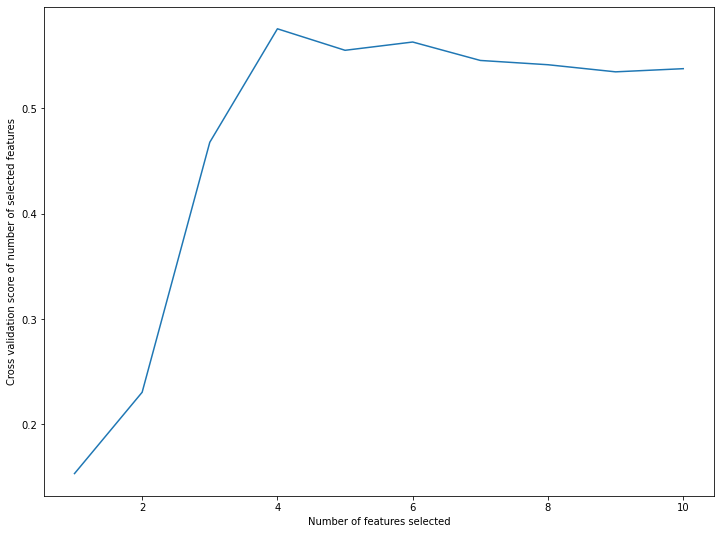

In [ ]:
plt.figure(figsize=(12,9))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_.get('mean_test_score')) + 1), rfecv.cv_results_.get('mean_test_score'))
plt.show()

#### División del conjunto de datos

In [ ]:
x = x[chosen]
y = df_without_color['price']

x_train, x_test, y_train, y_test  = train_test_split(x, y,
                                                     test_size=0.2,
                                                     random_state=42,
                                                     shuffle=True)

print('Training x Shape:', x_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing x Shape:', x_test.shape)
print('Testing y Shape:', y_test.shape)

Training x Shape: (22343, 4)
Training y Shape: (22343,)
Testing x Shape: (5586, 4)
Testing y Shape: (5586,)


## Regresión Lineal

In [ ]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_predict = lreg.predict(x_test)

In [ ]:
print('Mean Absolute Error:', MAE(y_test, y_predict))
print('Mean Squared Error:', MSE(y_test, y_predict))
print('R2 score:', r2_score(y_test,y_predict))

Mean Absolute Error: 34187639.204398334
Mean Squared Error: 4069999212563032.5
R2 score: 0.19138503296458298


## Árbol de Decisión

In [ ]:
# Creación del modelo
# ------------------------------------------------------------------------------
model2 = DecisionTreeRegressor(
            max_depth         = 30,
            random_state      = 42,
            max_features      = 4,
            min_samples_leaf  =2,
            min_samples_split =6
          )
          
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model2.fit(x_train, y_train)

# Estructura del árbol creado
# -----------------------------------------------------------------------------

print("-------------------------------------------")
print(f"Profundidad del árbol: {model2.get_depth()}")
print(f"Número de nodos terminales: {model2.get_n_leaves()}")
print("-------------------------------------------")

importancia_predictores = pd.DataFrame(
                            {'predictor': chosen,
                             'importancia': model2.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
print(importancia_predictores.sort_values('importancia', ascending=False))

#-------------------------------------------------------------------------------
predicciones = model2.predict(X = x_test)

# Metricas de Evaluación
print('Mean Squared Error:', MSE(y_test, predicciones))

r22 = r2_score(y_test,predicciones)
print(f"El valor de r2 es:{r22} ")

print('El Mean Absolute Error es :', MAE(y_test, predicciones))

-------------------------------------------
Profundidad del árbol: 30
Número de nodos terminales: 3454
-------------------------------------------
Importancia de los predictores en el modelo
-------------------------------------------
      predictor  importancia
0         brand     0.366195
2  transmission     0.225156
1         model     0.224195
3          year     0.184455
Mean Squared Error: 1662553320632570.8
El valor de r2 es:0.6696890027869731 
El Mean Absolute Error es : 11338517.572729351


## Random Forest

In [ ]:
# Train model
rfr = RandomForestRegressor(max_depth=30, max_features= 4, random_state=42,
                            min_samples_leaf=2, min_samples_split=3, n_estimators=300)

rfr.fit(x_train, y_train)

rfr_train_pred = rfr.predict(x_train)

In [ ]:
rfr_test_pred = rfr.predict(x_test)

print('Mean Squared Error:', MSE(y_test, rfr_test_pred))
print('Mean Absolute Error:', MAE(y_test, rfr_test_pred))
print('R2 score:', r2_score(y_test, rfr_test_pred))

Mean Squared Error: 1593901039645575.0
Mean Absolute Error: 10983859.889686087
R2 score: 0.6833286275210151


In [ ]:
# Get numerical feature importances
importances = list(rfr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
importance in zip(chosen, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

gdf = pd.DataFrame(feature_importances).rename(columns={0:'variable', 1:'importance'})
gdf

variable  importance
0         brand        0.35
1         model        0.23
2  transmission        0.22
3          year        0.19

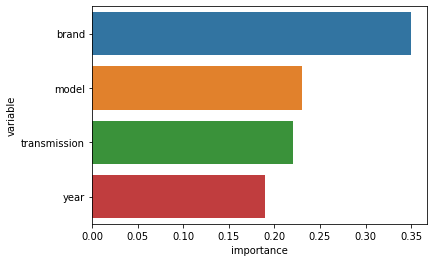

In [ ]:
%matplotlib inline

ax = sns.barplot(x='importance', y='variable', data=gdf)

## Cross-Validation

In [ ]:
cv = pd.DataFrame({'model':['linear_regression','decision_tree','random_forest']}, )

for sc in scoring:
    lrs = LinearRegression()
    lrs_scores = abs(cross_val_score(lreg, x_test, y_test, scoring=sc, cv=10))

    dts = DecisionTreeRegressor()
    dts_scores = abs(cross_val_score(dts, x_test, y_test, scoring=sc, cv=10))

    rfs = RandomForestRegressor()
    rfs_scores = abs(cross_val_score(rfs, x_test, y_test, scoring=sc, cv=10))

    cv = cv.join(pd.DataFrame({sc:[lrs_scores.mean(), dts_scores.mean(), rfs_scores.mean()]}))

cv.iloc[:,1:] = round(cv.iloc[:,1:],2)
cv

model  neg_root_mean_squared_error  neg_mean_absolute_error  \
0  linear_regression                  59869215.26              34280809.78   
1      decision_tree                  43961628.69              15063891.58   
2      random_forest                  39314610.42              13782037.06   

     r2  
0  0.24  
1  0.60  
2  0.69

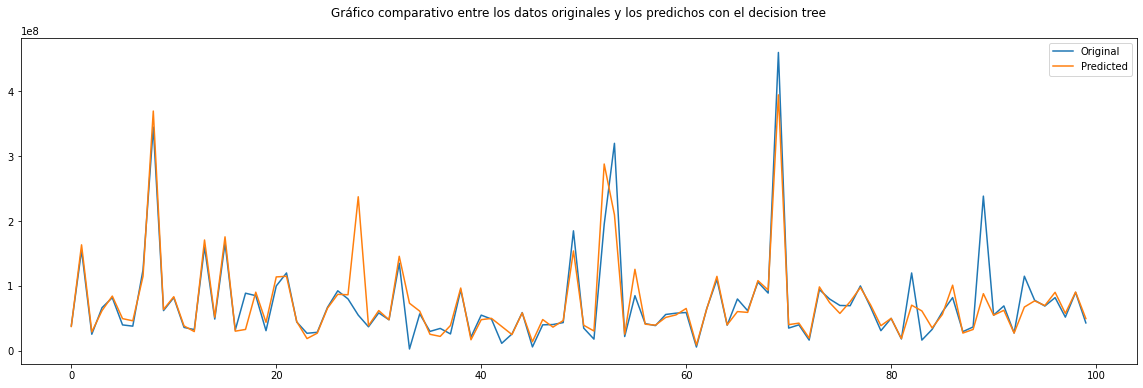

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

predictions = model2.predict(x_test)

x_ax=range(len(y_test.iloc[0:100]))
plt.plot(x_ax, y_test[0:100], label="Original")
plt.plot(x_ax,predictions[0:100], label= "Predicted")
plt.title("Gráfico comparativo entre los datos originales y los predichos con el decision tree\n")
plt.legend()

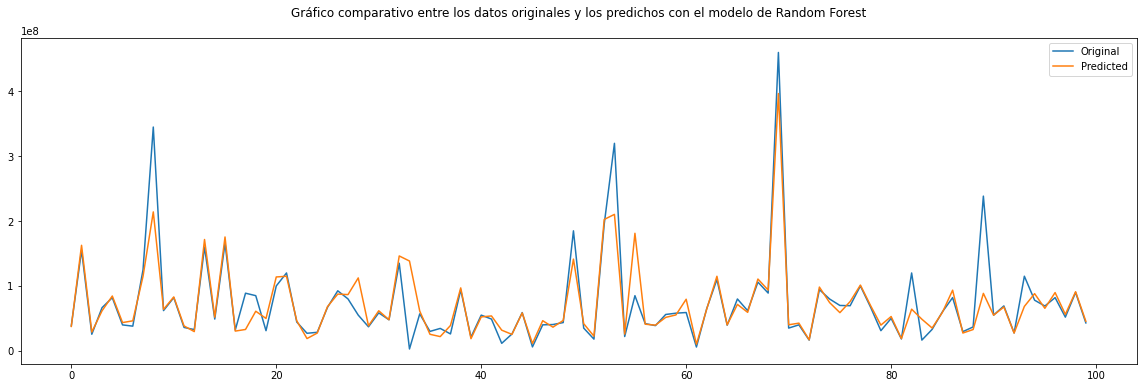

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

predictions2 = rfr.predict(x_test)

x_ax=range(len(y_test.iloc[0:100]))
plt.plot(x_ax, y_test[0:100], label="Original")
plt.plot(x_ax,predictions2[0:100], label= "Predicted")
plt.title("Gráfico comparativo entre los datos originales y los predichos con el modelo de Random Forest\n")
plt.legend()

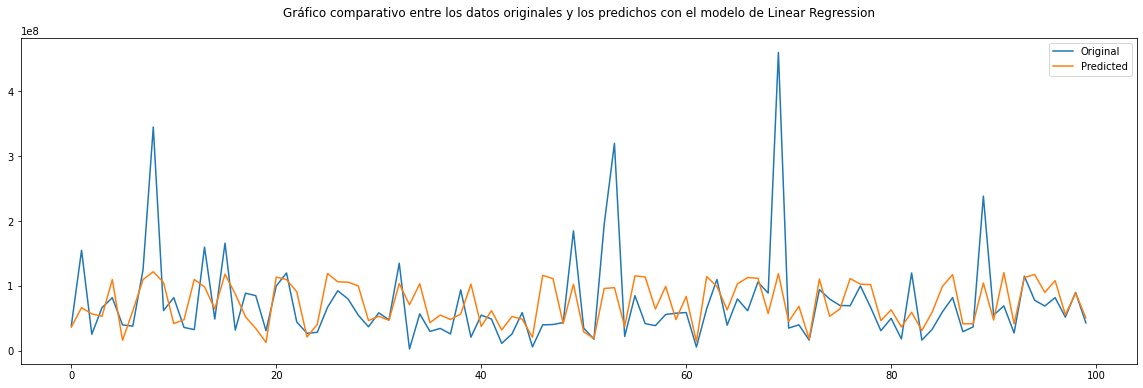

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

predictions3 = lreg.predict(x_test)

x_ax=range(len(y_test.iloc[0:100]))
plt.plot(x_ax, y_test[0:100], label="Original")
plt.plot(x_ax,predictions3[0:100], label= "Predicted")
plt.title("Gráfico comparativo entre los datos originales y los predichos con el modelo de Linear Regression\n")
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=511ee041-b4b1-4cd3-b8ea-b2652010eed2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>